In [1]:
# -*- coding: utf8

from scipy import stats as ss

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize']  = (18, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

In [2]:
plt.ion()
plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize']  = (12, 8)

In [3]:
def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

# Aula 19 - Regressão Múltipla

In [4]:
df = pd.read_csv('./aptosBH.txt', index_col=0)
df.head()

,area,quartos,suites,vagas,preco
ID,,,,,
353534.0,110.00,3.0,1.0,2.0,880000.0
366113.0,101.89,3.0,1.0,4.0,900000.0
186728.0,191.00,3.0,1.0,3.0,920000.0
366115.0,101.89,3.0,1.0,4.0,950000.0
353022.0,280.61,3.0,1.0,4.0,1000000.0


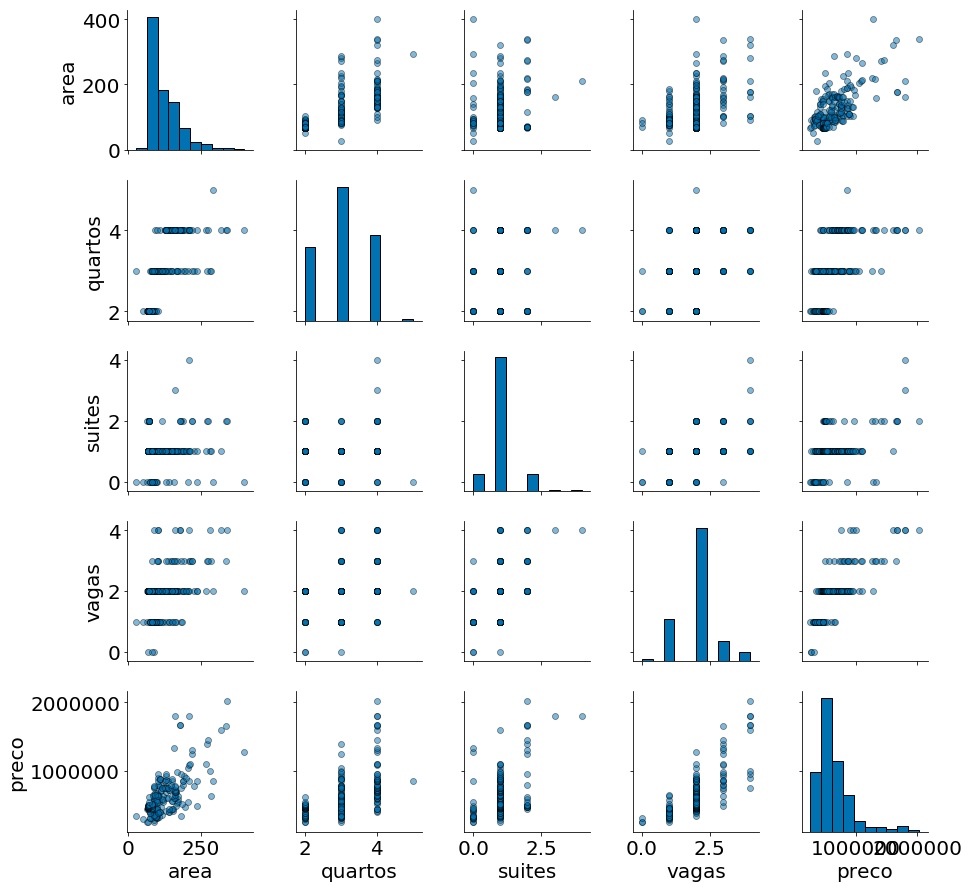

In [5]:
sns.pairplot(df, diag_kws={'edgecolor':'k'}, plot_kws={'alpha':0.5, 'edgecolor':'k'})

In [6]:
# df = df - df.mean()
# df = df / df.std(ddof=1)
# sns.pairplot(df, diag_kws={'edgecolor':'k'}, plot_kws={'alpha':0.5, 'edgecolor':'k'})

In [7]:
df = pd.read_csv('./aptosBH.txt', index_col=0)
y = df['preco']
X = df[['area', 'quartos', 'suites', 'vagas']]

In [8]:
y.shape

(216,)

In [9]:
X.shape

(216, 4)

In [10]:
X = X.values
y = y.values

In [11]:
def derivadas_regressao(theta, X, y):
    return -2 * ((y - X @ theta) * X.T).mean(axis=1)

In [12]:
def gd(theta, d_fun, X, y, lambda_=0.00005, tol=0.00001):
    theta = theta.copy()
    print('Iter {}; alpha, beta = '.format(0), theta)
    old_err_sq = np.inf
    i = 0
    while True:
        grad = d_fun(theta, X, y)
        theta_novo = theta - lambda_ * grad
        err_sq = ((X.dot(theta) - y) ** 2).mean()
        if np.abs(old_err_sq - err_sq) <= tol:
            break
        theta = theta_novo
        old_err_sq = err_sq
        print('Iter {}; alpha, beta = '.format(i+1), theta)
        i += 1
    return theta

In [13]:
df = pd.read_csv('./aptosBH.txt', index_col=0)
df = df - df.mean()
df = df / df.std(ddof=1)

y = df['preco']
X = df[['area', 'quartos', 'suites', 'vagas']]
# X['intercepto'] = 1

X = X.values
y = y.values

theta = np.ones(4)
theta = gd(theta, derivadas_regressao, X, y, lambda_=0.1)
theta

Iter 0; alpha, beta =  [1. 1. 1. 1.]
Iter 1; alpha, beta =  [0.69650163 0.69898044 0.75562183 0.71033143]
Iter 2; alpha, beta =  [0.5240305  0.52006975 0.60063455 0.54526209]
Iter 3; alpha, beta =  [0.42753369 0.41240249 0.49982485 0.45311537]
Iter 4; alpha, beta =  [0.37491238 0.34631799 0.43223596 0.40354112]
Iter 5; alpha, beta =  [0.34748122 0.30454013 0.38532932 0.37870839]
Iter 6; alpha, beta =  [0.33438702 0.27701958 0.35155009 0.36813959]
Iter 7; alpha, beta =  [0.32934498 0.25791937 0.32630413 0.36567927]
Iter 8; alpha, beta =  [0.32873125 0.24385426 0.30676419 0.3677144 ]
Iter 9; alpha, beta =  [0.33046893 0.23286337 0.29116367 0.37212895]
Iter 10; alpha, beta =  [0.33337811 0.22381147 0.27837771 0.37768916]
Iter 11; alpha, beta =  [0.33679719 0.21604047 0.26767348 0.38368167]
Iter 12; alpha, beta =  [0.34036254 0.20916713 0.25856075 0.38970036]
Iter 13; alpha, beta =  [0.34388067 0.20296581 0.25070173 0.39552043]
Iter 14; alpha, beta =  [0.34725431 0.19730086 0.24385622 0.40

array([0.38793881, 0.13510597, 0.18945001, 0.45375873])

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [15]:
model.coef_

array([0.39547414, 0.12651004, 0.18641188, 0.45621635])

In [16]:
def sgd(theta, d_fun, X, y, lambda_=0.01, tol=0.00001):
    theta = theta.copy()
    print('Iter {}; alpha, beta = '.format(0), theta)
    old_err_sq = np.inf
    for i in range(1000):
        # Escolhe ponto aleatório
        r = np.random.randint(len(y))
        X_r, y_r = X[r], y[r]
        X_r = X_r[None] # np.array([1, 2])[None] -> [[1, 2]]. Vira matriz
        
        # Deriva e atualiza
        grad = d_fun(theta, X_r, y_r)
        theta_novo = theta - lambda_ * grad
        err_sq = ((X.dot(theta) - y) ** 2).mean()
        
        if np.abs(err_sq - old_err_sq).mean() <= tol:
            break
        theta = theta_novo
        old_err_sq = err_sq
        
        print('Iter {}; alpha, beta = '.format(i+1), theta)
    return theta

In [17]:
df = pd.read_csv('./aptosBH.txt', index_col=0)
df = df - df.mean()
df = df / df.std(ddof=1)

y = df['preco']
X = df[['area', 'quartos', 'suites', 'vagas']]
# X['intercepto'] = 1

X = X.values
y = y.values

theta = np.ones(4)
theta = sgd(theta, derivadas_regressao, X, y, lambda_=0.1)
theta

Iter 0; alpha, beta =  [1. 1. 1. 1.]
Iter 1; alpha, beta =  [0.93876257 0.7519521  0.99204997 1.00999405]
Iter 2; alpha, beta =  [ 0.12937774 -0.29362371 -0.57388277 -0.15620691]
Iter 3; alpha, beta =  [ 0.78595507 -0.31053255 -0.58506634  0.53268194]
Iter 4; alpha, beta =  [ 0.77320269 -0.31223172 -0.58619017  0.50018792]
Iter 5; alpha, beta =  [ 0.7585933  -0.31720192 -0.58947748  0.50432042]
Iter 6; alpha, beta =  [ 0.76995581 -0.06239826 -0.59852044  0.5156884 ]
Iter 7; alpha, beta =  [ 0.71006531  0.07899273 -0.6035384   0.52199652]
Iter 8; alpha, beta =  [ 1.12738453  0.0614697  -0.11444924  0.88623709]
Iter 9; alpha, beta =  [ 1.05221527 -0.0547782  -0.11817503  0.89092081]
Iter 10; alpha, beta =  [ 0.93591033 -0.34512282 -0.10787072  0.87796718]
Iter 11; alpha, beta =  [ 0.94272767 -0.33457992 -0.12213026  0.87754239]
Iter 12; alpha, beta =  [ 0.99895981 -0.24761793 -0.1193431   0.87403863]
Iter 13; alpha, beta =  [ 0.84226116 -0.42712992 -0.37364456  0.70768696]
Iter 14; alpha

Iter 506; alpha, beta =  [1.27087221 0.10731125 0.03746916 0.88524654]
Iter 507; alpha, beta =  [ 1.15730029 -0.06832567  0.27502263  0.89232309]
Iter 508; alpha, beta =  [ 1.18923198 -0.01894388  0.20823249  0.89033346]
Iter 509; alpha, beta =  [ 1.13337232 -0.1300644   0.20467104  0.89481059]
Iter 510; alpha, beta =  [ 1.04509158 -0.14071299  0.19762803  0.69117263]
Iter 511; alpha, beta =  [1.06725625 0.1310884  0.18798182 0.70329897]
Iter 512; alpha, beta =  [0.97327026 0.11519135 0.17746745 0.39929197]
Iter 513; alpha, beta =  [0.93760236 0.10906598 0.17341611 0.40438494]
Iter 514; alpha, beta =  [0.95375956 0.30719889 0.16638439 0.41322458]
Iter 515; alpha, beta =  [0.87510042 0.18555395 0.33091232 0.41812575]
Iter 516; alpha, beta =  [0.85894209 0.18209652 0.32862557 0.42100045]
Iter 517; alpha, beta =  [0.87939214 0.19140805 0.06872961 0.41325833]
Iter 518; alpha, beta =  [ 0.73033921 -0.0516417   0.07735543  0.40241474]
Iter 519; alpha, beta =  [ 0.7399899  -0.05000936  0.1250

Iter 998; alpha, beta =  [1.63125494 0.11890036 0.88880541 0.66463431]
Iter 999; alpha, beta =  [ 1.4268457  -0.19721484  0.8786738   0.67737084]
Iter 1000; alpha, beta =  [ 1.37506353 -0.20915558  0.87077616  0.68729903]


array([ 1.37506353, -0.20915558,  0.87077616,  0.68729903])

In [18]:
def bootstrap_regression(X, y, n=10000, size=None):
    if size is None:
        size = len(df)
        
    T = np.zeros(shape=(n, X.shape[1]))
    for i in range(n):
        # Gera amostras com reposição
        idx = np.random.choice(len(y), len(y))
        Xb = X[idx]
        yb = y[idx]
        
        # Fit usando sklearn
        model = LinearRegression(fit_intercept=True)
        model.fit(Xb, yb)
        
        T[i] = model.coef_
    return T

In [19]:
y = df['preco'].values
names = ['area', 'quartos', 'suites', 'vagas']
X = df[names].values
T = bootstrap_regression(X, y)

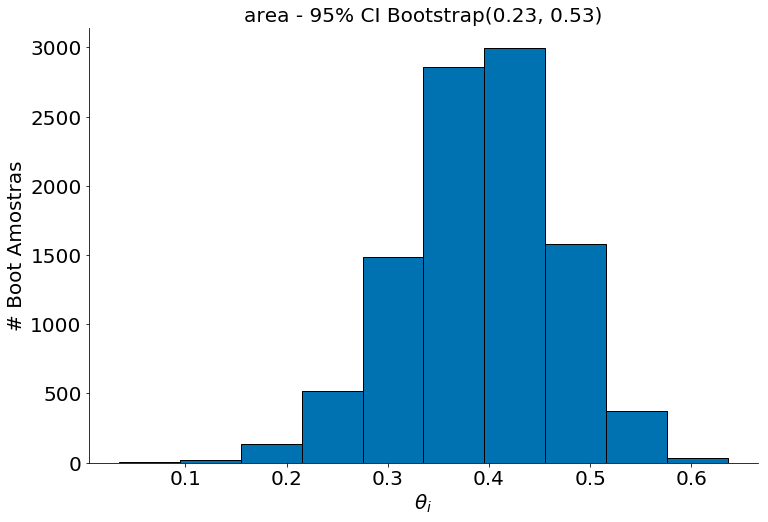

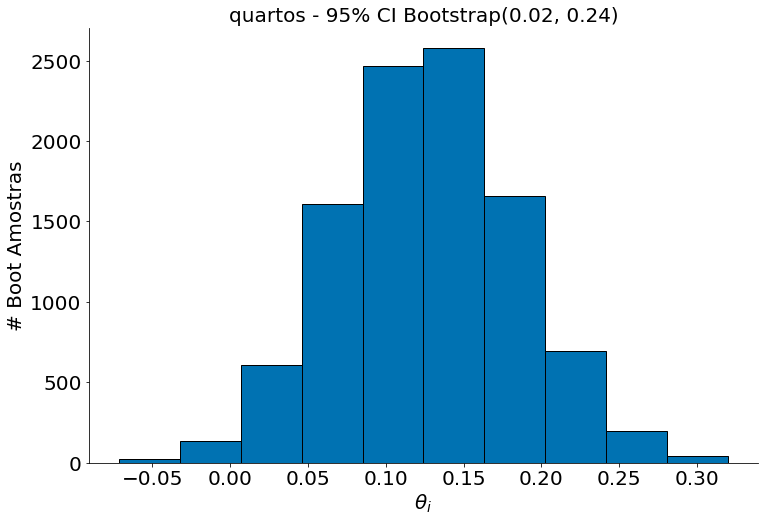

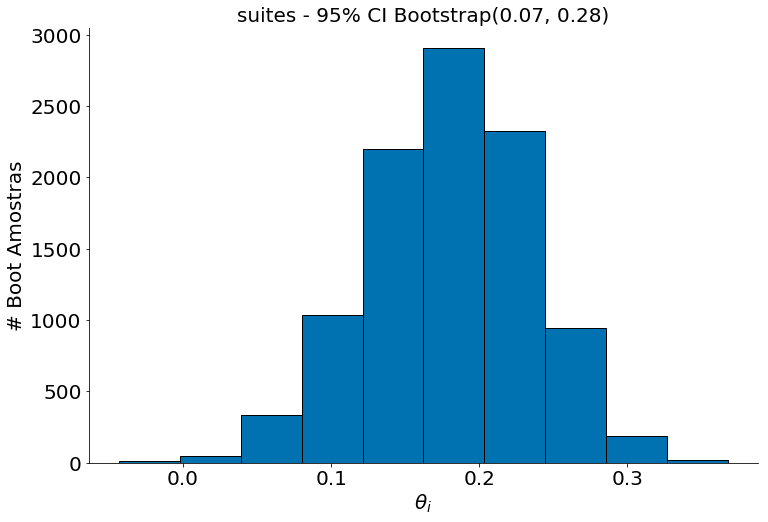

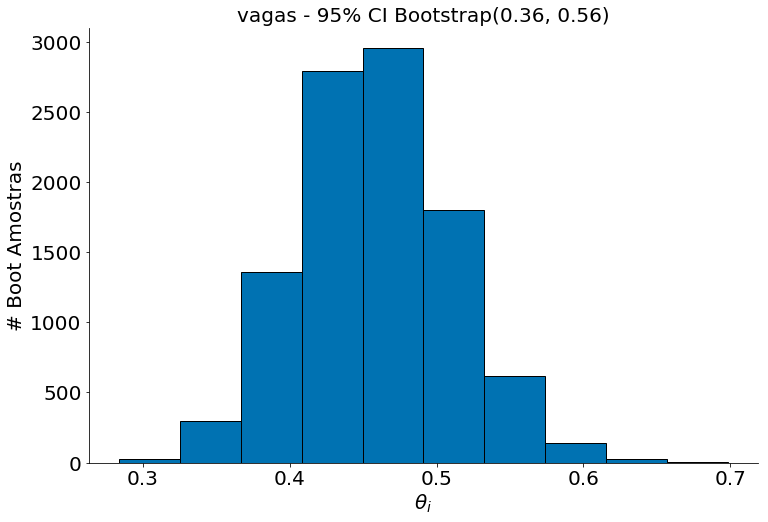

In [20]:
for col in range(T.shape[1]):
    plt.hist(T[:, col], edgecolor='k')
    plt.title('{} - 95% CI Bootstrap({:.2f}, {:.2f})'.format(names[col],
                                                             np.percentile(T[:, col], 2.5),
                                                             np.percentile(T[:, col], 97.5)))
    plt.xlabel(r'$\theta_i$')
    plt.ylabel('# Boot Amostras')
    despine()
    plt.show()

In [21]:
df = pd.read_csv('./hybrid.csv')
df.head()

,vehicle,year,msrp,acceleration,mpg,class
0,Prius (1st Gen),1997,24509.74,7.46,41.26,Compact
1,Tino,2000,35354.97,8.20,54.10,Compact
2,Prius (2nd Gen),2000,26832.25,7.97,45.23,Compact
3,Insight,2000,18936.41,9.52,53.00,Two Seater
4,Civic (1st Gen),2001,25833.38,7.04,47.04,Compact


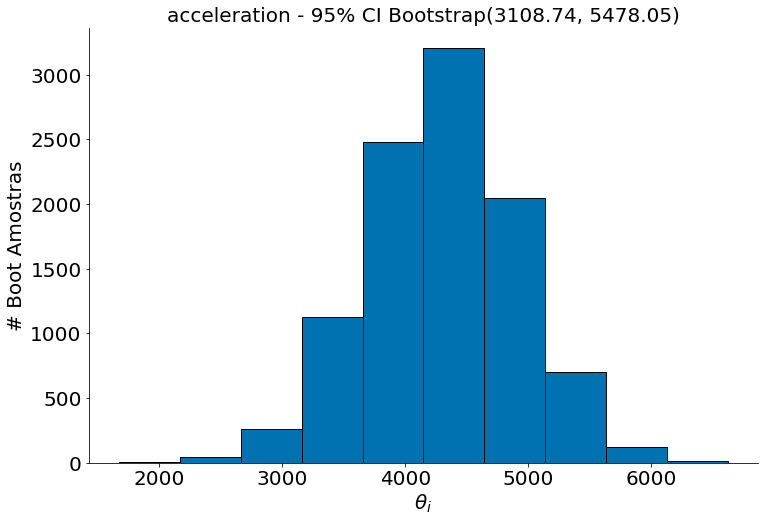

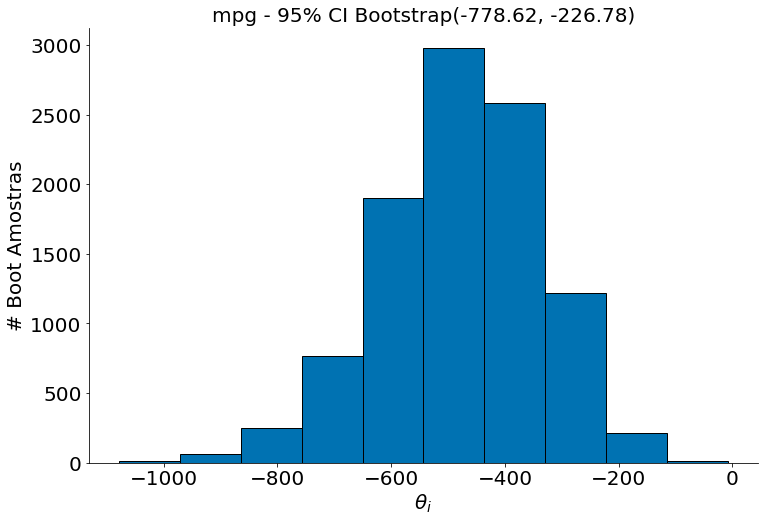

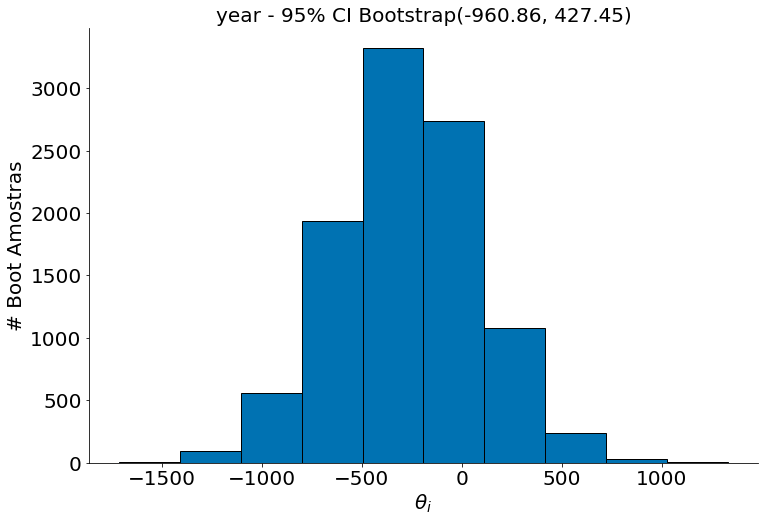

In [22]:
y = df['msrp'].values
names = ['acceleration', 'mpg', 'year']
X = df[names].values
T = bootstrap_regression(X, y)
for col in range(T.shape[1]):
    plt.hist(T[:, col], edgecolor='k')
    plt.title('{} - 95% CI Bootstrap({:.2f}, {:.2f})'.format(names[col],
                                                             np.percentile(T[:, col], 2.5),
                                                             np.percentile(T[:, col], 97.5)))
    plt.xlabel(r'$\theta_i$')
    plt.ylabel('# Boot Amostras')
    despine()
    plt.show()

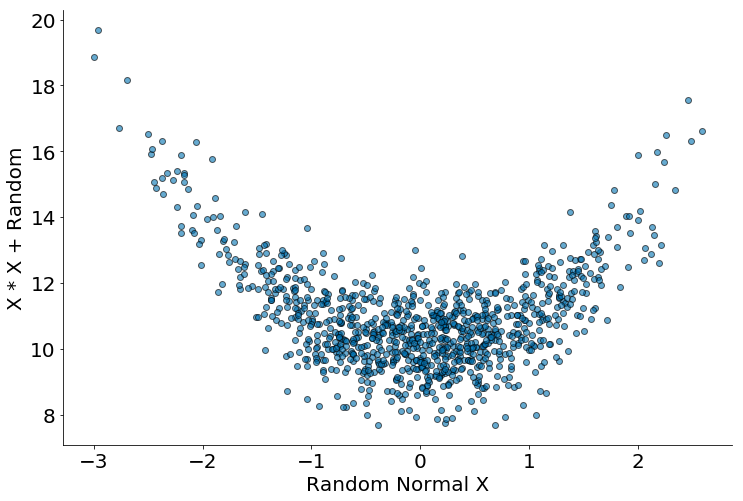

In [23]:
x = np.random.randn(1000)
y = x * x + np.random.randn(1000) + 10
plt.scatter(x, y, edgecolor='k', alpha=0.6)
plt.xlabel('Random Normal X')
plt.ylabel('X * X + Random')
despine()

In [24]:
X = np.zeros(shape=(len(x), 2))
X[:, 0] = 1
X[:, 1] = x * x
X

array([[1.        , 0.03760691],
       [1.        , 0.05412346],
       [1.        , 1.71818365],
       ...,
       [1.        , 1.90524116],
       [1.        , 0.34760119],
       [1.        , 3.11771509]])

In [25]:
theta = np.ones(2)
theta = gd(theta, derivadas_regressao, X, y, lambda_=0.01)

Iter 0; alpha, beta =  [1. 1.]
Iter 1; alpha, beta =  [1.17941319 1.16666997]
Iter 2; alpha, beta =  [1.35211394 1.3214976 ]
Iter 3; alpha, beta =  [1.51845848 1.46521119]
Iter 4; alpha, beta =  [1.67878226 1.59849531]
Iter 5; alpha, beta =  [1.83340121 1.7219934 ]
Iter 6; alpha, beta =  [1.98261284 1.83631027]
Iter 7; alpha, beta =  [2.12669741 1.94201437]
Iter 8; alpha, beta =  [2.2659189  2.03963998]
Iter 9; alpha, beta =  [2.400526   2.12968924]
Iter 10; alpha, beta =  [2.53075301 2.2126341 ]
Iter 11; alpha, beta =  [2.65682071 2.2889181 ]
Iter 12; alpha, beta =  [2.77893713 2.35895806]
Iter 13; alpha, beta =  [2.89729835 2.42314572]
Iter 14; alpha, beta =  [3.01208917 2.48184921]
Iter 15; alpha, beta =  [3.1234838  2.53541445]
Iter 16; alpha, beta =  [3.23164647 2.58416651]
Iter 17; alpha, beta =  [3.33673205 2.62841085]
Iter 18; alpha, beta =  [3.43888657 2.66843447]
Iter 19; alpha, beta =  [3.53824777 2.70450705]
Iter 20; alpha, beta =  [3.63494557 2.73688195]
Iter 21; alpha, be

Iter 285; alpha, beta =  [9.71024545 1.09807546]
Iter 286; alpha, beta =  [9.71361533 1.09648517]
Iter 287; alpha, beta =  [9.71694763 1.09491263]
Iter 288; alpha, beta =  [9.72024276 1.09335762]
Iter 289; alpha, beta =  [9.72350113 1.09181996]
Iter 290; alpha, beta =  [9.72672316 1.09029944]
Iter 291; alpha, beta =  [9.72990925 1.08879589]
Iter 292; alpha, beta =  [9.7330598  1.08730911]
Iter 293; alpha, beta =  [9.73617521 1.08583892]
Iter 294; alpha, beta =  [9.73925587 1.08438512]
Iter 295; alpha, beta =  [9.74230217 1.08294753]
Iter 296; alpha, beta =  [9.74531449 1.08152599]
Iter 297; alpha, beta =  [9.74829321 1.08012029]
Iter 298; alpha, beta =  [9.7512387  1.07873028]
Iter 299; alpha, beta =  [9.75415134 1.07735577]
Iter 300; alpha, beta =  [9.75703149 1.0759966 ]
Iter 301; alpha, beta =  [9.75987952 1.07465258]
Iter 302; alpha, beta =  [9.76269578 1.07332355]
Iter 303; alpha, beta =  [9.76548062 1.07200935]
Iter 304; alpha, beta =  [9.76823441 1.07070981]
Iter 305; alpha, bet

Text(0, 0.5, 'X * X + Random')

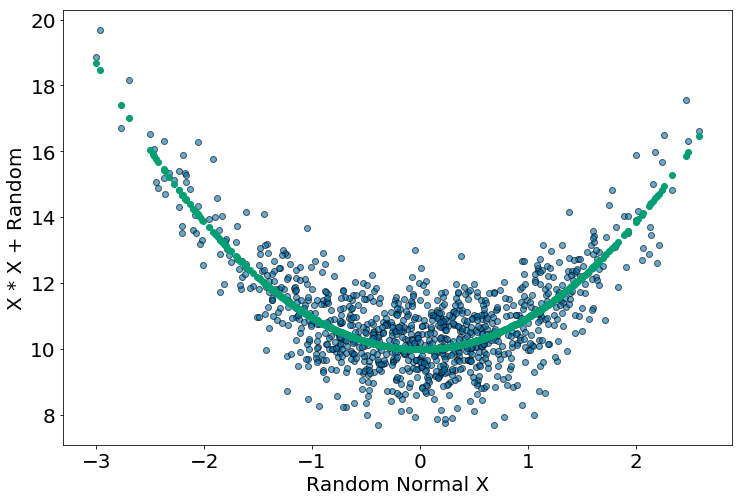

In [26]:
plt.scatter(x, y, edgecolor='k', alpha=0.6)
plt.scatter(x, X @ theta)
plt.xlabel('Random Normal X')
plt.ylabel('X * X + Random')